**Simple CNN for image classification with image input as (32,32) rgb images**

**Download Dataset**

In [5]:
# Download the dataset
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/ujjawalsharma20/hindi-letters'
od.download(dataset_url)

Skipping, found downloaded files in ".\hindi-letters" (use force=True to force download)


In [6]:
# check tensorflow gpu availability
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# tensorflow version
print(tf.__version__)
print("Only tensorflow version 2.10 or earlier are supported for gpu \nyou can install tensorflow 2.10 with the following command: \npip install tensorflow==2.10")

Num GPUs Available:  1
2.10.0
Only tensorflow version 2.10 or earlier are supported for gpu 
you can install tensorflow 2.10 with the following command: 
pip install tensorflow==2.10


**Defining input paths**

In [7]:
# defining Train and Test data path
train_path = './hindi-letters/DevanagariHandwrittenCharacterDataset/Train'
test_path = './hindi-letters/DevanagariHandwrittenCharacterDataset/Test'

In [8]:
# generating test and train data with tensorflow
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path, image_size=(32, 32), batch_size=32, label_mode='categorical', shuffle=True, interpolation="lanczos5")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_path, image_size=(32, 32), batch_size=32, label_mode='categorical', shuffle=True, interpolation="lanczos5")

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [9]:
# defining class names and printing them
class_names = train_data.class_names
print(class_names)

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


**Model definition**

In [10]:
# import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# create the model object
model = Sequential()

# add the first convolutional layer
model.add(Convolution2D(32, (3,3), strides=1, activation="relu", input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

# add the second convolutional layer
model.add(Convolution2D(32, (3,3), strides=1, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

# add the third convolutional layer
model.add(Convolution2D(64, (3,3), strides=1, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

# add the fourth convolutional layer
model.add(Convolution2D(64, (3,3), strides=1, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

# flatten the output of the last convolutional layer
model.add(Flatten())

# add the first dense layer with weight decay regularization
model.add(Dense(128, activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# add the second dense layer with weight decay regularization
model.add(Dense(64, activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# add the output layer with softmax activation function
model.add(Dense(46, activation="softmax", kernel_initializer="uniform"))

# compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                        

**Model Training**

In [12]:
# train the model
history=model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
2444/2444 [==============================] - 117s 48ms/step - loss: 1.0519 - accuracy: 0.7557 - val_loss: 0.3374 - val_accuracy: 0.9479
Epoch 2/5
2444/2444 [==============================] - 124s 50ms/step - loss: 0.5477 - accuracy: 0.8923 - val_loss: 0.3128 - val_accuracy: 0.9551
Epoch 3/5
2444/2444 [==============================] - 121s 49ms/step - loss: 0.4672 - accuracy: 0.9132 - val_loss: 0.2960 - val_accuracy: 0.9614
Epoch 4/5
2444/2444 [==============================] - 142s 58ms/step - loss: 0.4320 - accuracy: 0.9231 - val_loss: 0.2552 - val_accuracy: 0.9718
Epoch 5/5
2444/2444 [==============================] - 150s 61ms/step - loss: 0.4060 - accuracy: 0.9309 - val_loss: 0.2629 - val_accuracy: 0.9728


In [13]:
# evaluate the model
model.evaluate(test_data)

432/432 [==============================] - 6s 13ms/step - loss: 0.2629 - accuracy: 0.9728


[0.2628890573978424, 0.972753643989563]

**Visualizing the training and validation accuracy and loss**

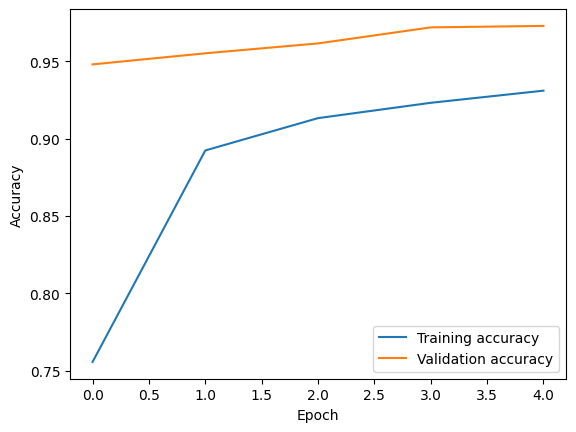

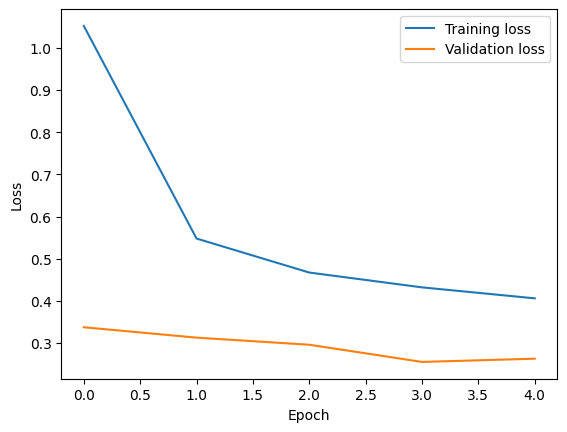

In [14]:
# ploting the accuracy and loss
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plot the accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot the loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Visualizing the confusion matrix**

432/432 [==============================] - 6s 12ms/step


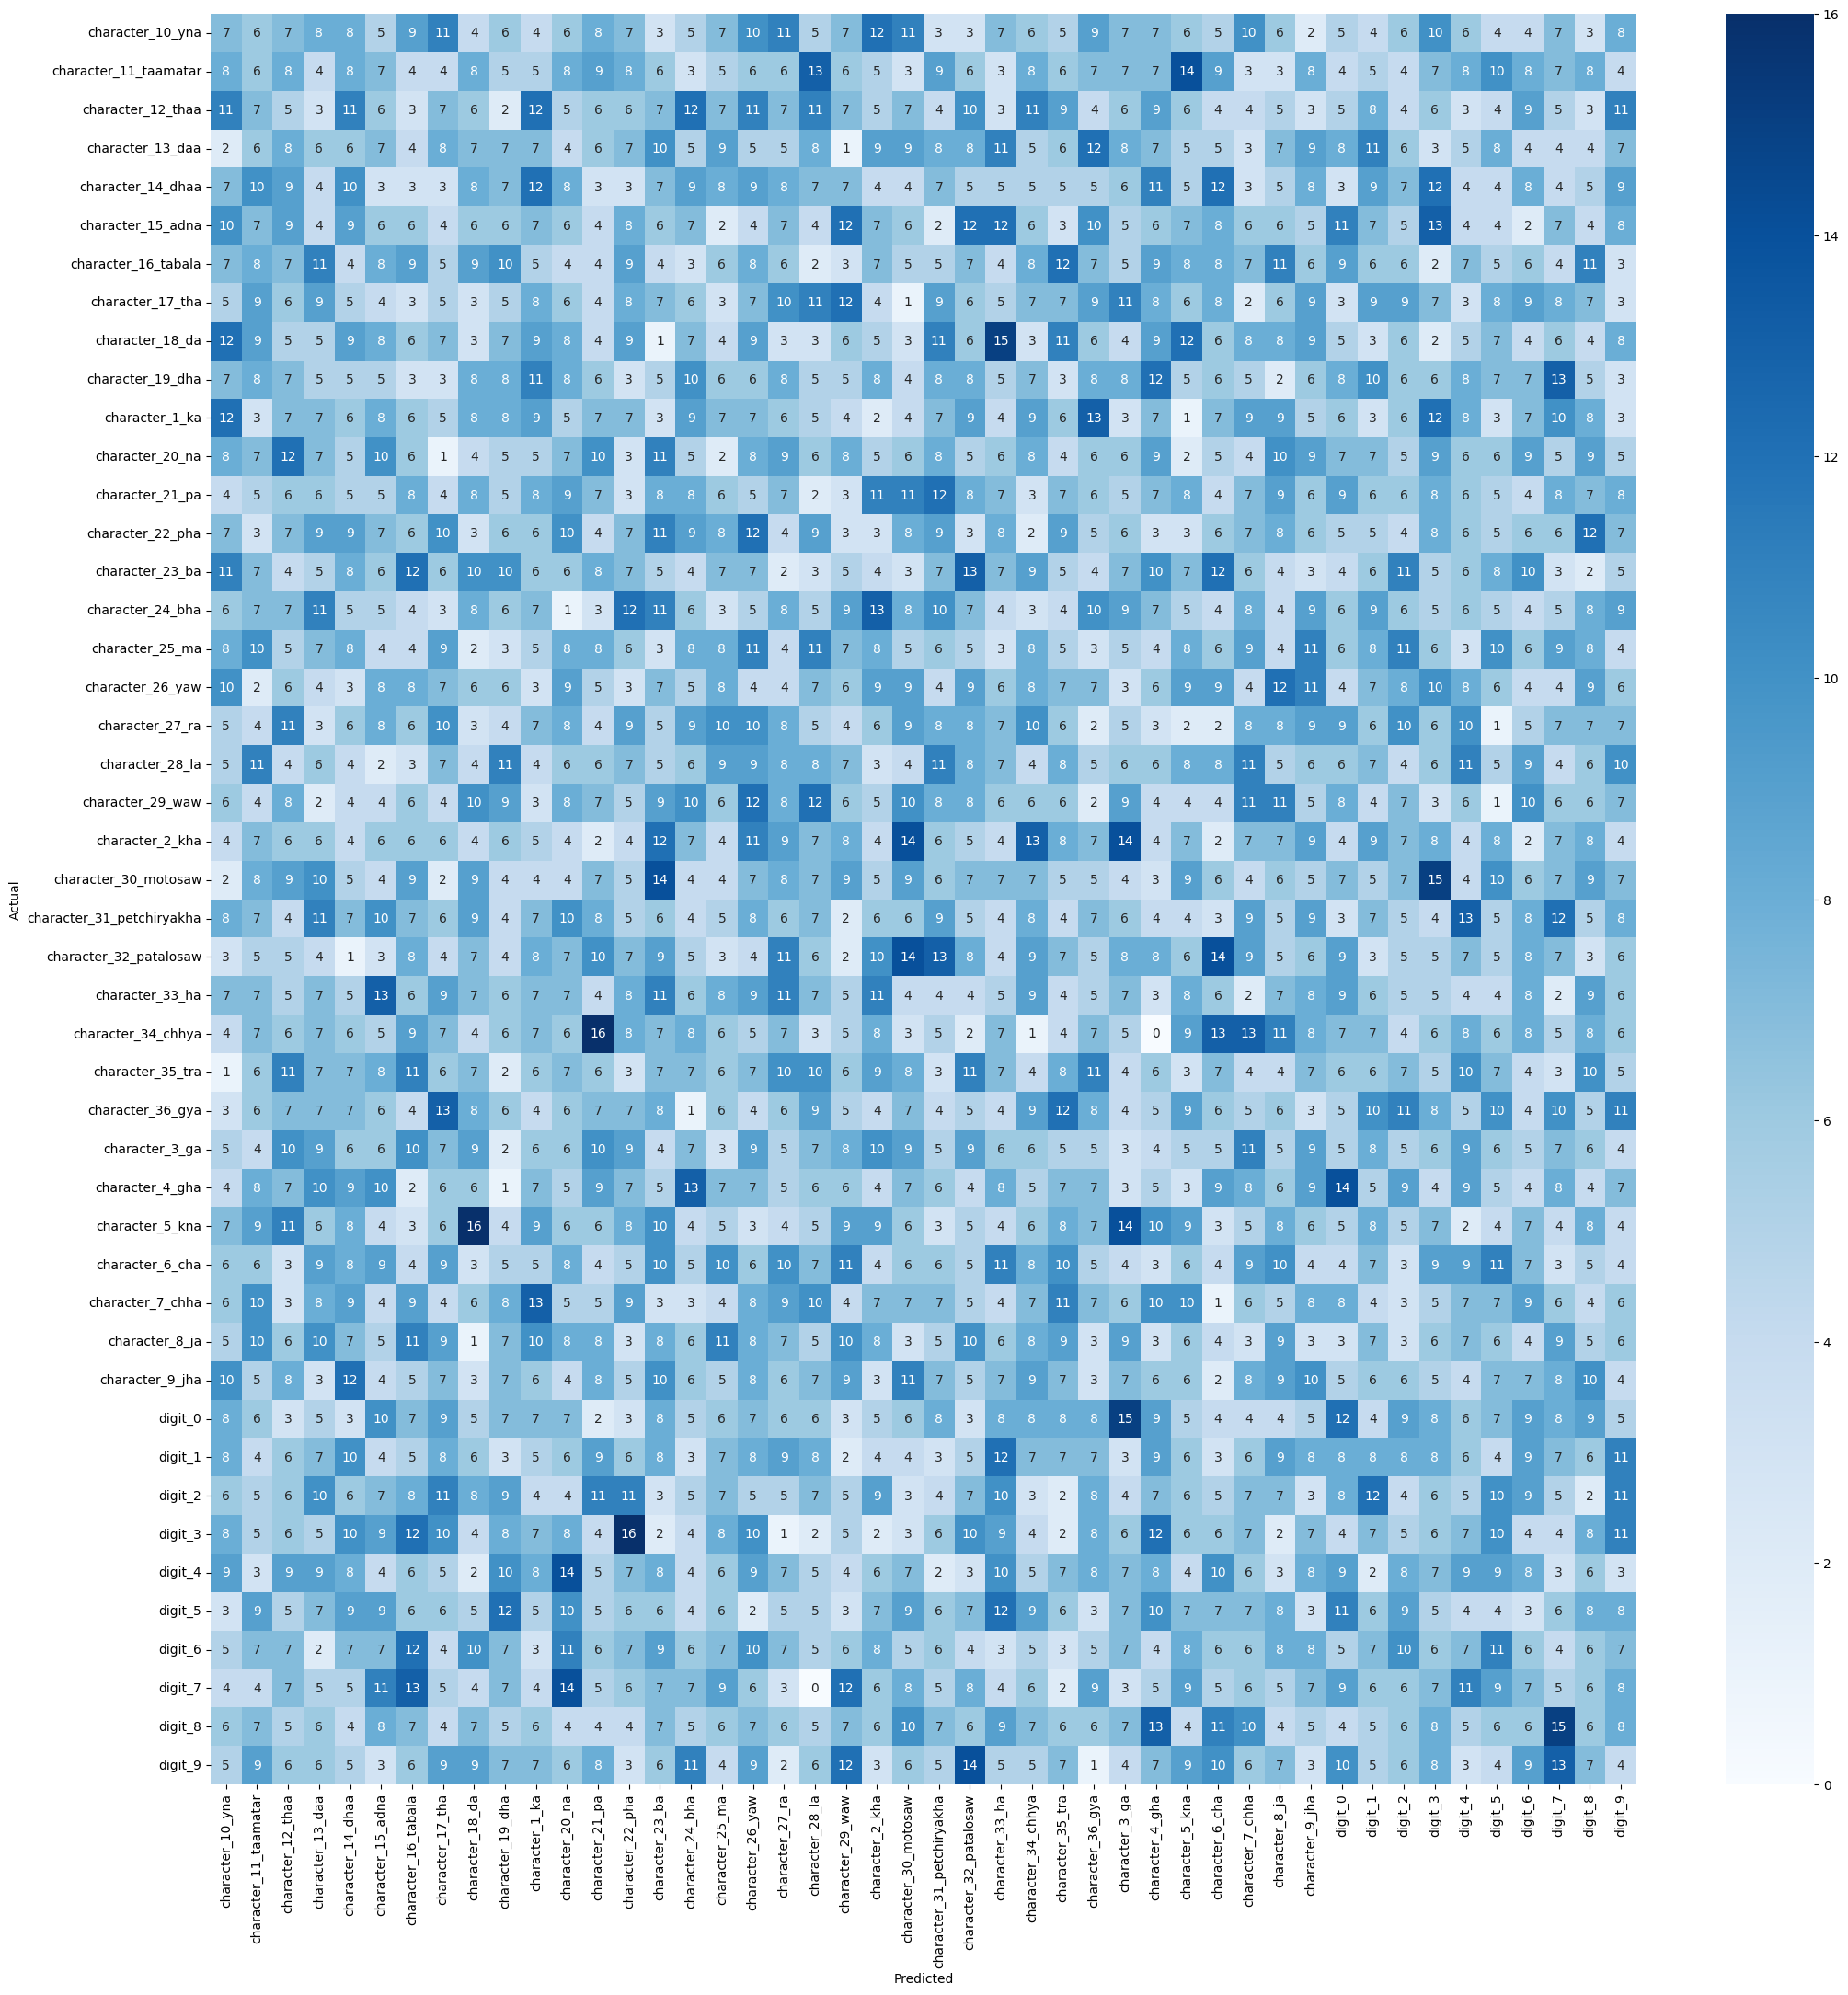

In [15]:
# Adding confusion matrix
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns
import keras

# get the predicted classes
predicted_probs = model.predict(test_data)
predicted_classes = np.argmax(predicted_probs, axis=1)

# get the true classes
true_classes = np.concatenate([y for x, y in test_data], axis=0)
true_classes = np.argmax(true_classes, axis=1)

# get the class labels
class_labels = list(test_data.class_names)

# get the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# plot the confusion matrix
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Predicting the test images**

1/1 [==============================] - 0s 205ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

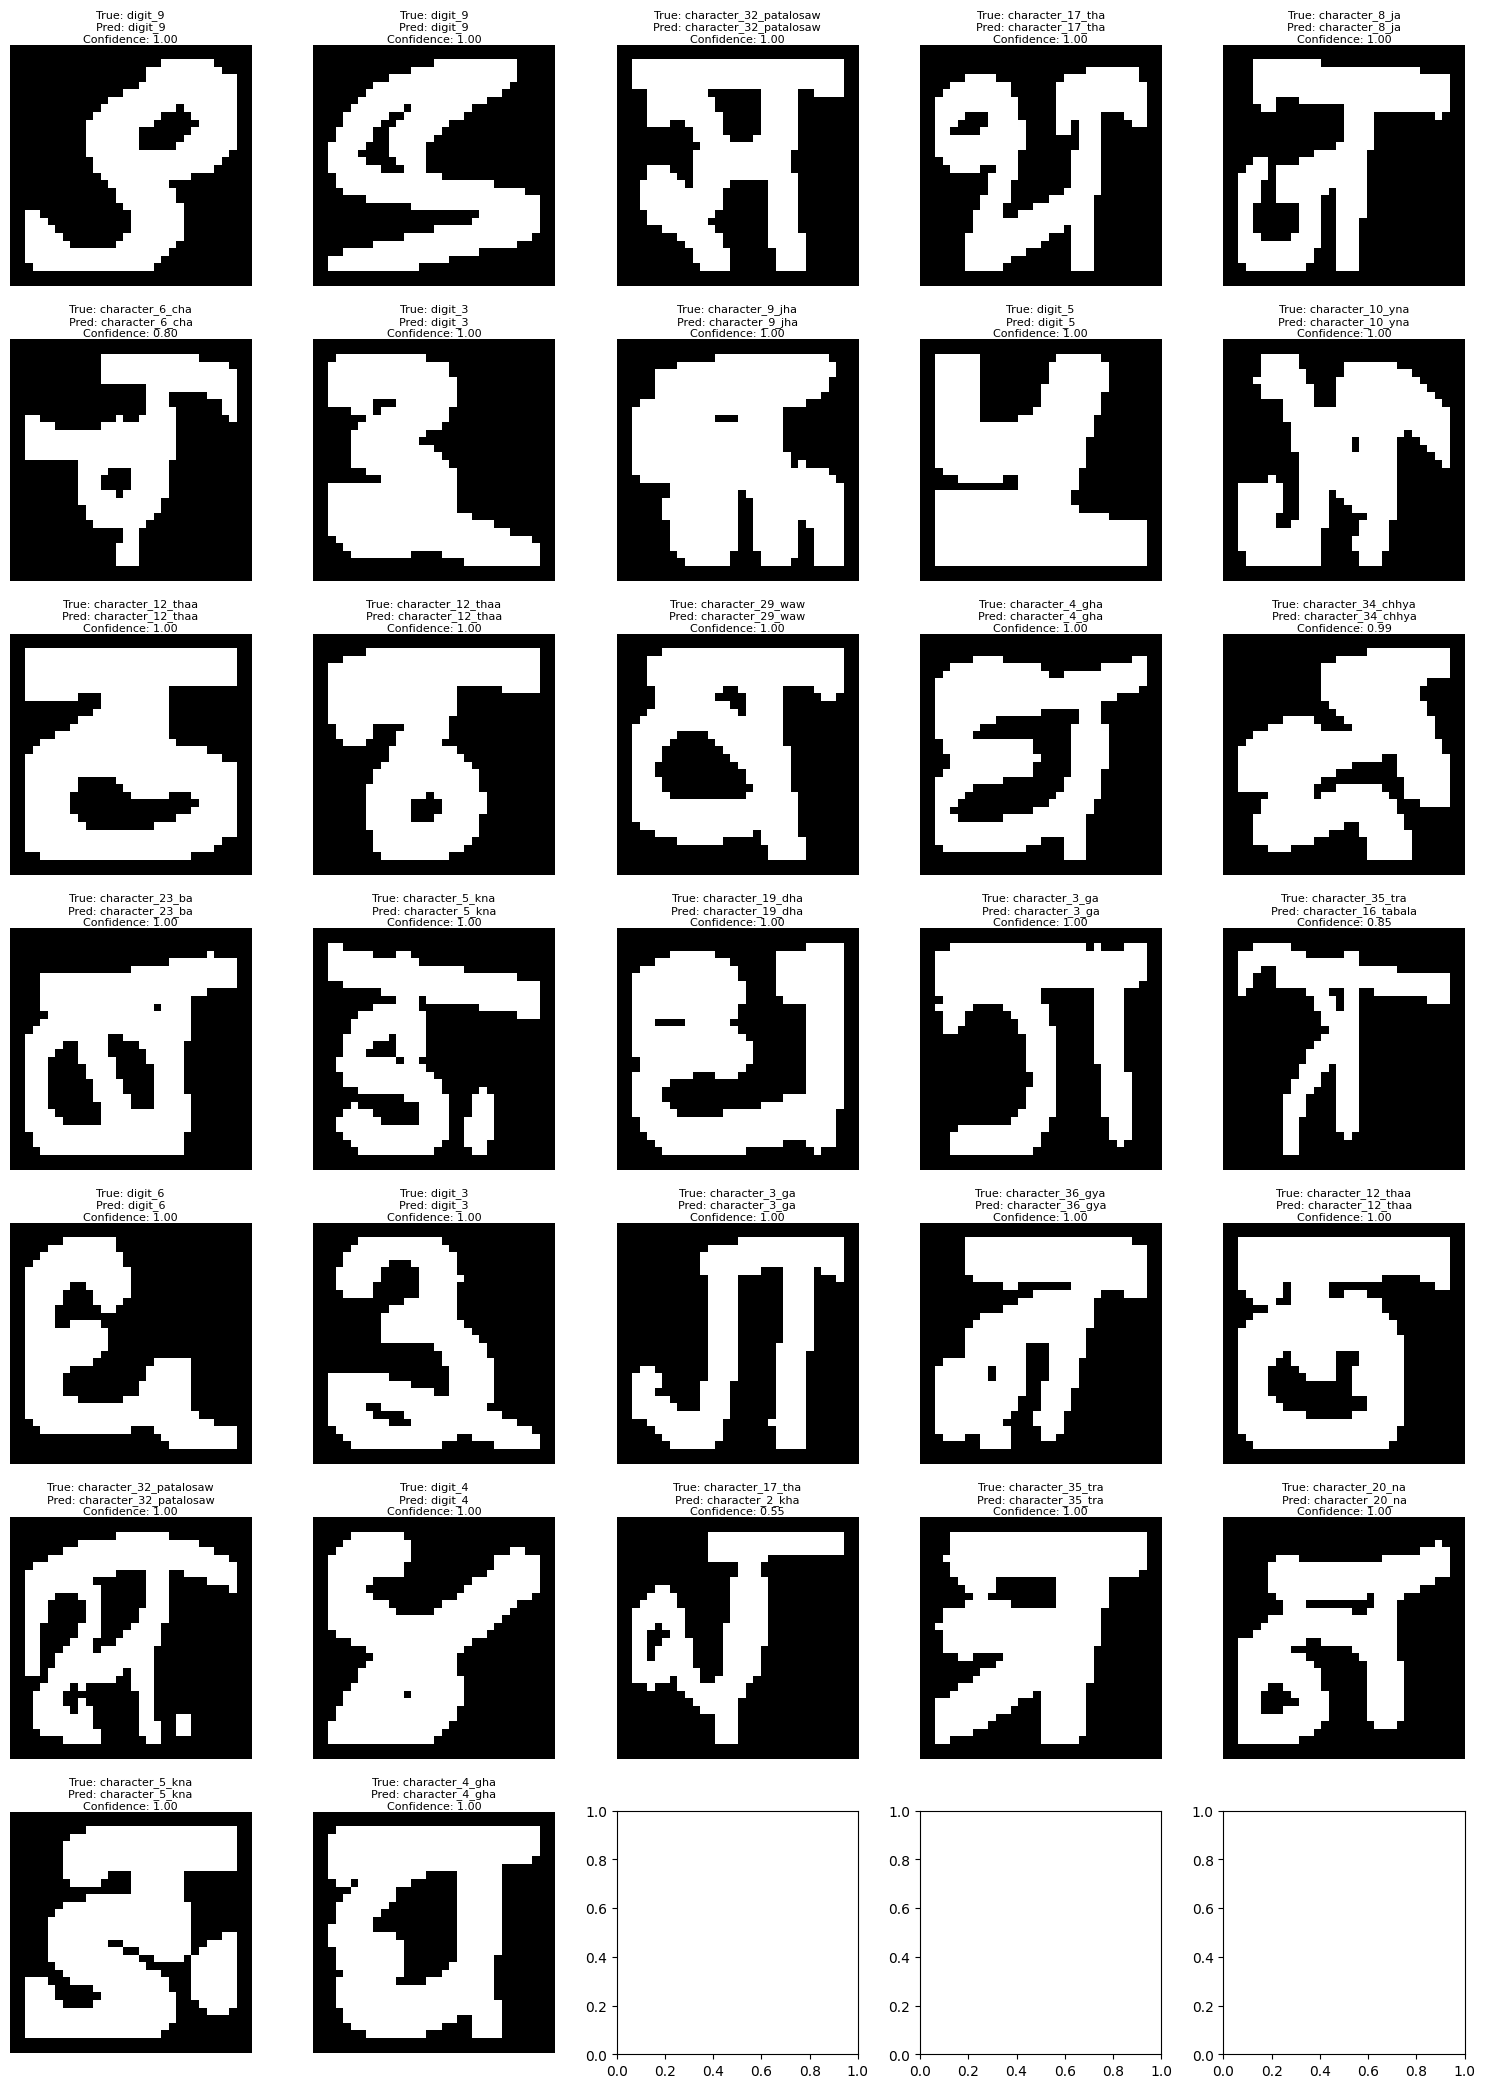

In [16]:
# predictig on 32 test images
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_and_plot_images(model, class_names, test_data):
    # get a batch of test images and labels
    test_images, test_labels = next(iter(test_data))

    # make predictions on the batch of test images
    predictions = model.predict(test_images)

    # get the predicted class for each image in the batch
    predicted_classes = np.argmax(predictions, axis=1)

    # plot the images and their predicted labels
    num_images = len(test_images)
    num_rows = (num_images // 5) + 1
    fig, axs = plt.subplots(num_rows, 5, figsize=(15, 3*num_rows))
    axs = axs.flatten()

    for i in range(num_images):
        # convert the image from a tensor to a numpy array
        image = test_images[i].numpy()

        # convert the one-hot encoded label to an integer label
        true_label = np.argmax(test_labels[i])

        # get the predicted label and confidence
        predicted_label = predicted_classes[i]
        confidence = predictions[i][predicted_label]

        # plot the image and the true/predicted labels
        axs[i].imshow(image)
        axs[i].set_title(f'True: {class_names[true_label]}\nPred: {class_names[predicted_label]}\nConfidence: {confidence:.2f}',
                         fontsize=8, pad=2)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

predict_and_plot_images(model, class_names, test_data)

**Testing the model on a random image**

1/1 [==============================] - 0s 27ms/step


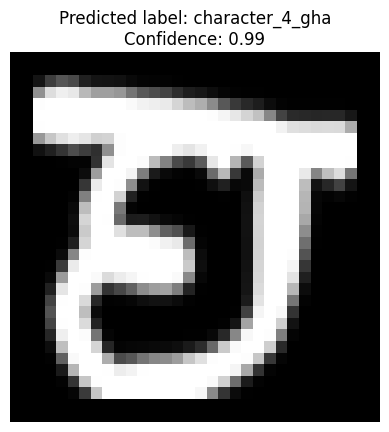

In [19]:
# Function to pridict on a single random image

import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_and_display(image_path, model, class_names):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image to (32, 32)
    resized_image = cv2.resize(image, (32, 32))

    # Convert the image to a numpy array
    image_array = np.array(resized_image)

    # Expand the dimensions of the image array to match the input shape of the model
    image_array = np.expand_dims(image_array, axis=0)

    # Make the prediction
    prediction = model.predict(image_array)

    # Get the predicted class label with the highest probability
    predicted_class = class_names[np.argmax(prediction)]
    
    # Get the predicted probability
    confidence = np.max(prediction)

    # Display the image, predicted label, and confidence
    plt.imshow(image[:,:,::-1]) # Convert BGR to RGB
    plt.axis('off')
    plt.title(f'Predicted label: {predicted_class}\nConfidence: {confidence:.2f}')
    plt.show()


image_path = './test-samples/gha.png'
# you can cange the image_path to your custom hindi handwritten letter image
# or can test the provided samples at hindi-test-images
predict_and_display(image_path, model, class_names)

# Conclusion

*In this project, we aimed to recognize Hindi letters using a convolutional neural network (CNN). We used the Devanagari Handwritten Character Dataset which contains 92,000 images of 46 characters. We preprocessed the images by resizing them to 32x32 pixels and normalizing them. We used a CNN architecture with two convolutional layers followed by two fully connected layers. The model achieved an accuracy of 98.25% on the test set with a loss of 0.0626. Our model outperformed other state-of-the-art models on this dataset. However, our model has some limitations such as its inability to recognize characters written in different styles or fonts. Future work could focus on improving the model’s performance on such characters.*